In [1]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from plot_img import plot_img

In [2]:
file_names = os.listdir('C:/Users/ACER/workspace/1project/MRI')

train_image=[]
for im in file_names:
    img=image.load_img('C:/Users/ACER/workspace/1project/MRI/'+im,target_size=(96,96),color_mode='grayscale')
    img=image.img_to_array(img)
    img=img/255
    train_image.append(img)

clean_df=np.array(train_image)

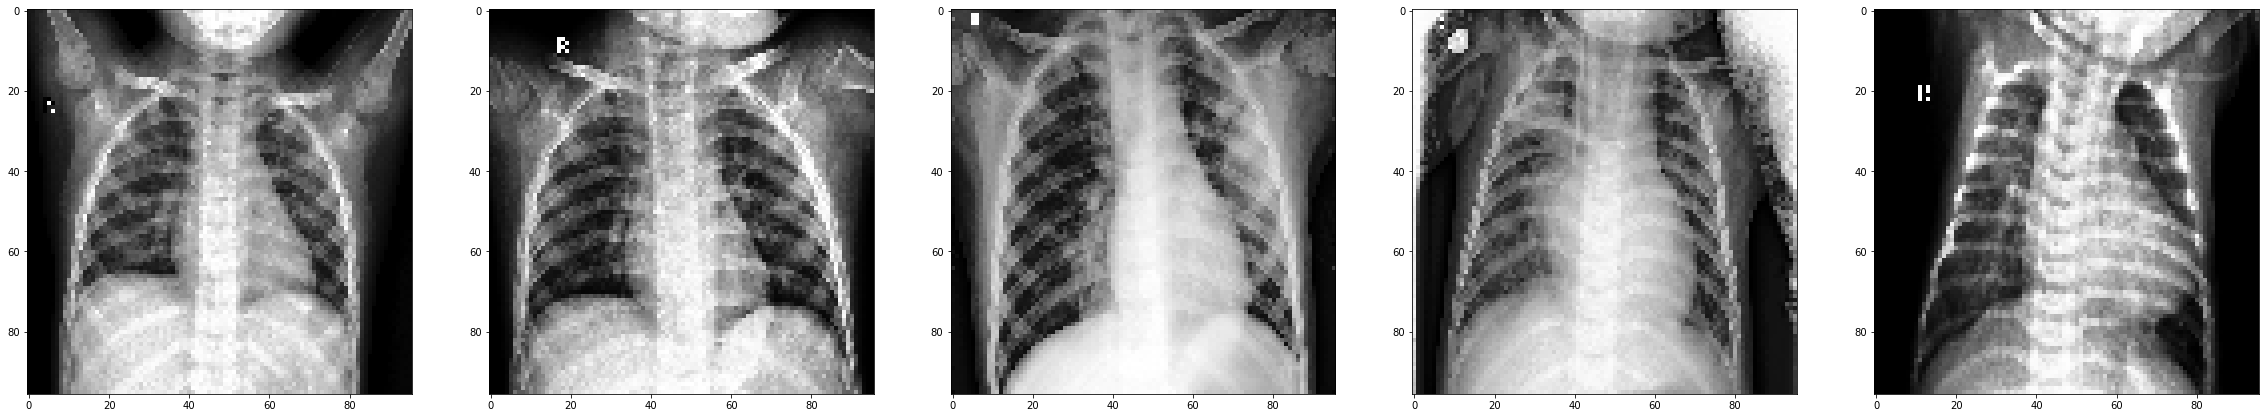

In [3]:
plot_img(clean_df)

In [4]:
from Noise import add_noise

noised_df=[]
for img in clean_df:
    noisy=add_noise(img)
    noised_df.append(noisy)

noised_df=np.array(noised_df)

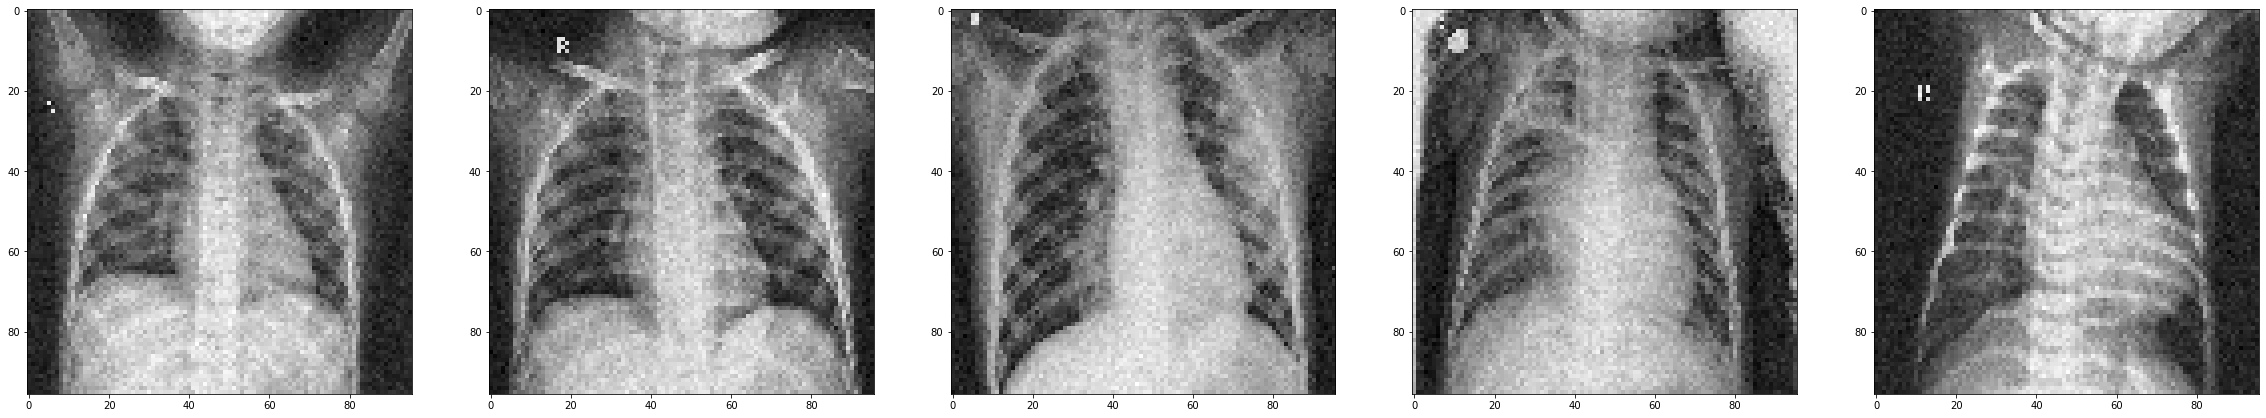

In [5]:
plot_img(noised_df)

In [6]:
from sklearn.model_selection import train_test_split

xnoised,xtest = train_test_split(noised_df, test_size=0.15)

In [7]:
xnoised.shape

(108, 96, 96, 1)

In [8]:
xtest.shape

(20, 96, 96, 1)

In [9]:
from autoencoder import autoencoder

model= autoencoder()

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(xnoised, xnoised, epochs=30, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/30
11/11 [==============================] - 9s 852ms/step - loss: 0.6280 - val_loss: 0.5332
Epoch 2/30
11/11 [==============================] - 9s 797ms/step - loss: 0.5310 - val_loss: 0.5131
Epoch 3/30
11/11 [==============================] - 9s 792ms/step - loss: 0.5101 - val_loss: 0.5011
Epoch 4/30
11/11 [==============================] - 9s 810ms/step - loss: 0.5012 - val_loss: 0.4967
Epoch 5/30
11/11 [==============================] - 9s 790ms/step - loss: 0.4973 - val_loss: 0.4946
Epoch 6/30
11/11 [==============================] - 9s 812ms/step - loss: 0.4950 - val_loss: 0.4914
Epoch 7/30
11/11 [==============================] - 9s 787ms/step - loss: 0.4928 - val_loss: 0.4894
Epoch 8/30
11/11 [==============================] - 9s 816ms/step - loss: 0.4915 - val_loss: 0.4878
Epoch 9/30
11/11 [==============================] - 9s 833ms/step - loss: 0.4896 - val_loss: 0.4865
Epoch 10/30
11/11 [==============================] - 9s 799ms/step - loss: 0.4886 - val_loss: 0.4856

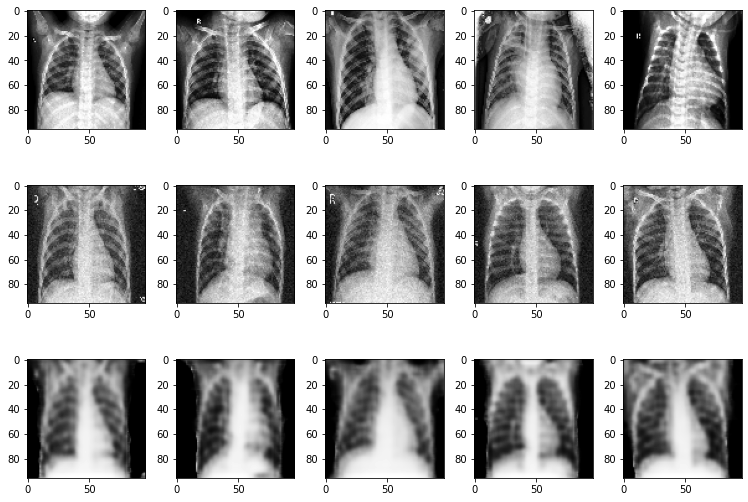

In [11]:
from predict import plot_predictions

pred= model.predict(xtest[:5])
plot_predictions(clean_df[:5],xtest[:5], pred[:5])